In [39]:
%matplotlib inline
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Verdana">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Roboto", Verdana, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Verdana", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)

<span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Note:</span>
<div class="alert alert-block alert-warning">Disclaimer: This kernel/notebook is only for academic/educational purposes and understanding of various tools available. Please it for informational purposes only. This is not a qualified guide for any decision making </div>

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">0.Introduction </span>

![Palantir Technologies](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Palantir_Technologies_logo.svg/1024px-Palantir_Technologies_logo.svg.png)

## Palantir - A Company Info from [Wikipedia](https://en.wikipedia.org/wiki/Palantir_Technologies) 

> A *palantír* is a fictional magical artefact from J. R. R. Tolkien's Middle-earth legendarium. A palantír was an indestructible ball of crystal, used for communication and to see events in other parts of Arda, whether past or future.

> Palantir Technologies is a public American software company that specializes in big data analytics. Headquartered in Denver, Colorado, it was founded by Peter Thiel, Nathan Gettings, Joe Lonsdale, Stephen Cohen, and Alex Karp in 2003. The company's name is derived from The Lord of the Rings where the magical palantíri were "seeing-stones," described as indestructible balls of crystal used for communication and to see events in other parts of the world.

> The company is known for three projects in particular: Palantir Gotham, Palantir Metropolis, and Palantir Foundry. Palantir Gotham is used by counter-terrorism analysts at offices in the United States Intelligence Community (USIC) and United States Department of Defense. In the past, Gotham was used by fraud investigators at the Recovery Accountability and Transparency Board, a former US federal agency which operated from 2009 to 2015. Gotham was also used by cyber analysts at Information Warfare Monitor, a Canadian public-private venture which operated from 2003 to 2012. Palantir Metropolis is used by hedge funds, banks, and financial services firms. Palantir Foundry is used by corporate clients such as Morgan Stanley, Merck KGaA, Airbus, and Fiat Chrysler Automobiles NV.

> Palantir's original clients were federal agencies of the USIC. It has since expanded its customer base to serve state and local governments, as well as private companies in the financial and healthcare industries.

## Let us analyze and visualize

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">1. Import Libraries</span>

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
   
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">2. Load Dataset</span>

In [42]:
url = 'https://github.com/RomanPilyushin/google-colab/blob/main/data/palantir/Palantir_stock_history.csv?raw=true'
PLTR_Data = pd.read_csv(url, index_col=0)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">3. Simple EDA of Stock Price Movement </span>

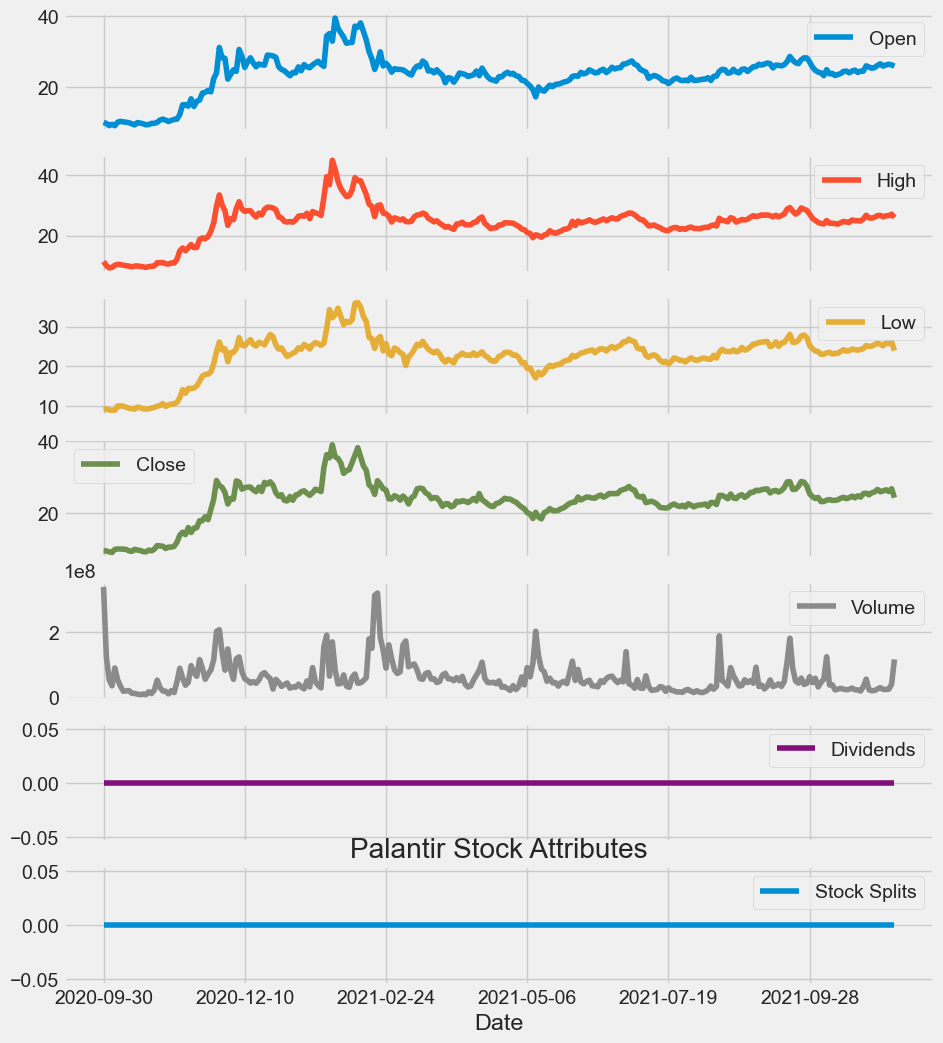

In [43]:
PLTR_Data.plot(subplots = True, figsize = (10,12))
plt.title('Palantir Stock Attributes')
plt.show()

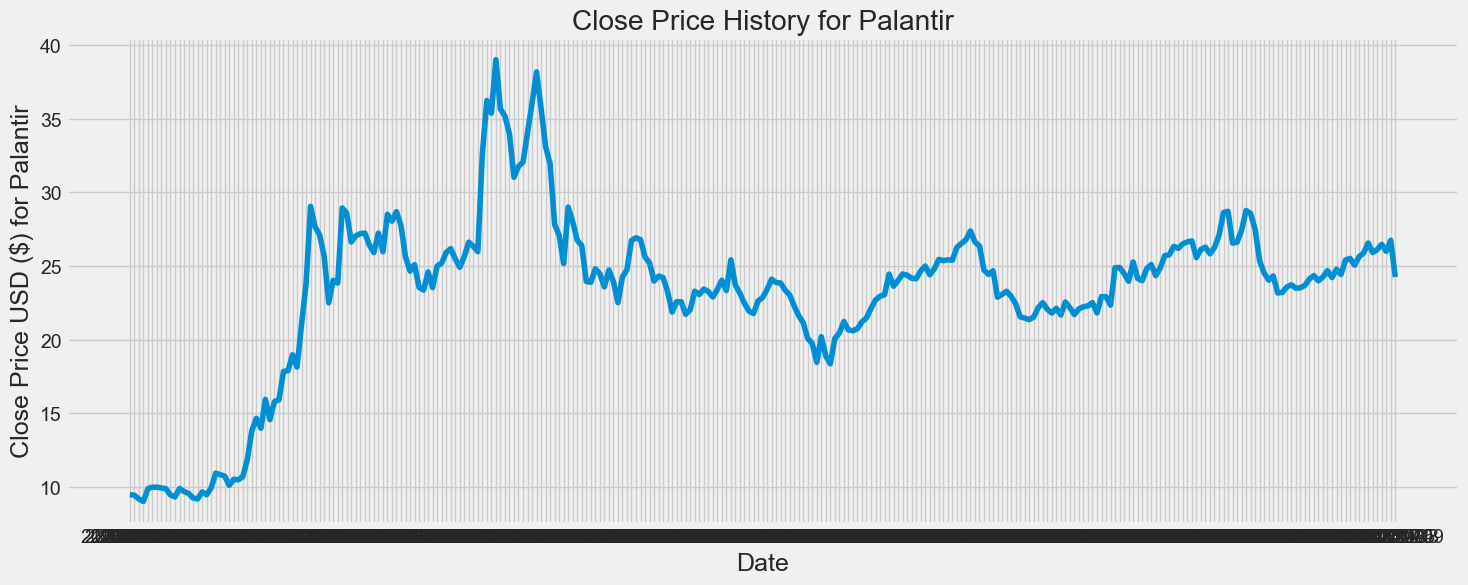

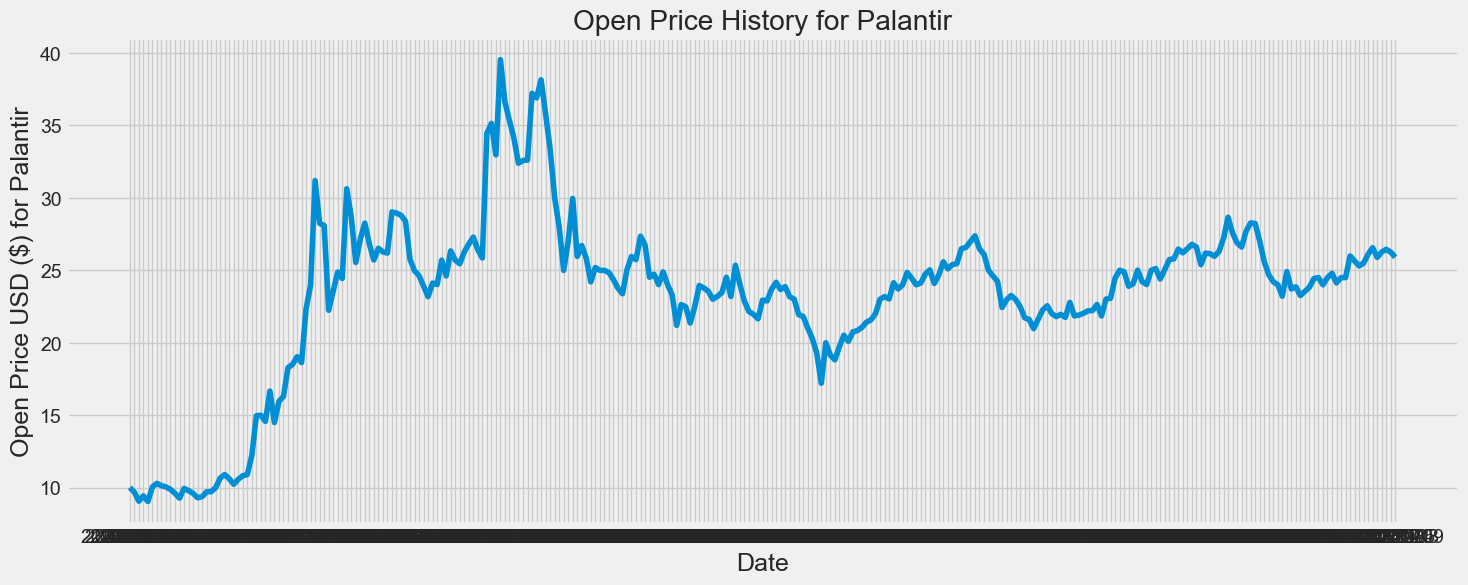

In [44]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(PLTR_Data, 'Close', 'Palantir')
plot_close_val(PLTR_Data, 'Open',  'Palantir')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 4. Basic Company Info </span>

In [45]:

url = 'https://github.com/RomanPilyushin/google-colab/blob/main/data/palantir/Palantir_stock_info.csv?raw=true'
PLTR_info = pd.read_csv(url, index_col=0)
PLTR_info.drop(PLTR_info.loc[PLTR_info['Value']=='nan'].index, inplace=True)
pltr = PLTR_info.sort_values('Value').style
pltr

,Value
Key,
returnOnAssets,-0.31799
trailingEps,-0.79
returnOnEquity,-0.90319
ebitdaMargins,-0.94085
profitMargins,-0.95135003
operatingMargins,-0.95145
ebitda,-1249760000
netIncomeToCommon,-1263715968
gmtOffSetMilliseconds,-18000000


<Axes: xlabel='Date'>

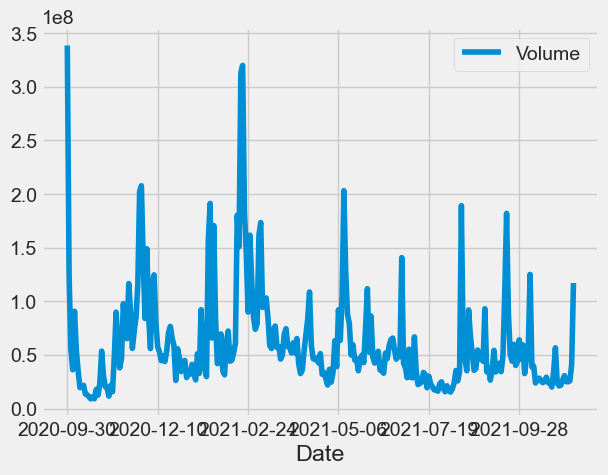

In [46]:
PLTR_Data[["Volume"]].plot()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5. Basic CAGR (Compound Annual Growth Rate)</span>

In [121]:
url = 'https://github.com/RomanPilyushin/google-colab/blob/main/data/palantir/Palantir_stock_history.csv?raw=true'
PLTR_Data = pd.read_csv(url, header=0, index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], parse_dates=True)
# Get the number of days in `ma`
days = (PLTR_Data.index[-1] - PLTR_Data.index[0]).days

# Calculate the CAGR 
cagr = ((((PLTR_Data['Close'][-1]) / PLTR_Data['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Palantir since IPO is", round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Palantir since IPO is 133.58 % per year


# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5.1 Basic Rolling Averages </span>

In [48]:
# Isolate the adjusted closing prices 
adj_close_px = PLTR_Data['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-10-27    25.48600
2021-10-28    25.47200
2021-10-29    25.45625
2021-11-01    25.45425
2021-11-02    25.43475
2021-11-03    25.44825
2021-11-04    25.45675
2021-11-05    25.44975
2021-11-08    25.47275
2021-11-09    25.42250
Name: Close, dtype: float64

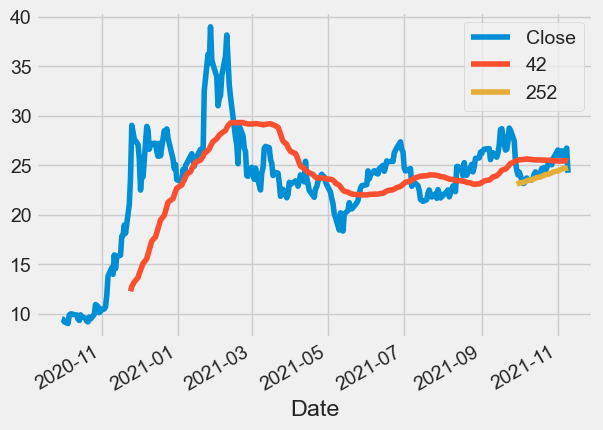

In [49]:
# Short moving window rolling mean
PLTR_Data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
PLTR_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
PLTR_Data[['Close', '42', '252']].plot()

plt.show()

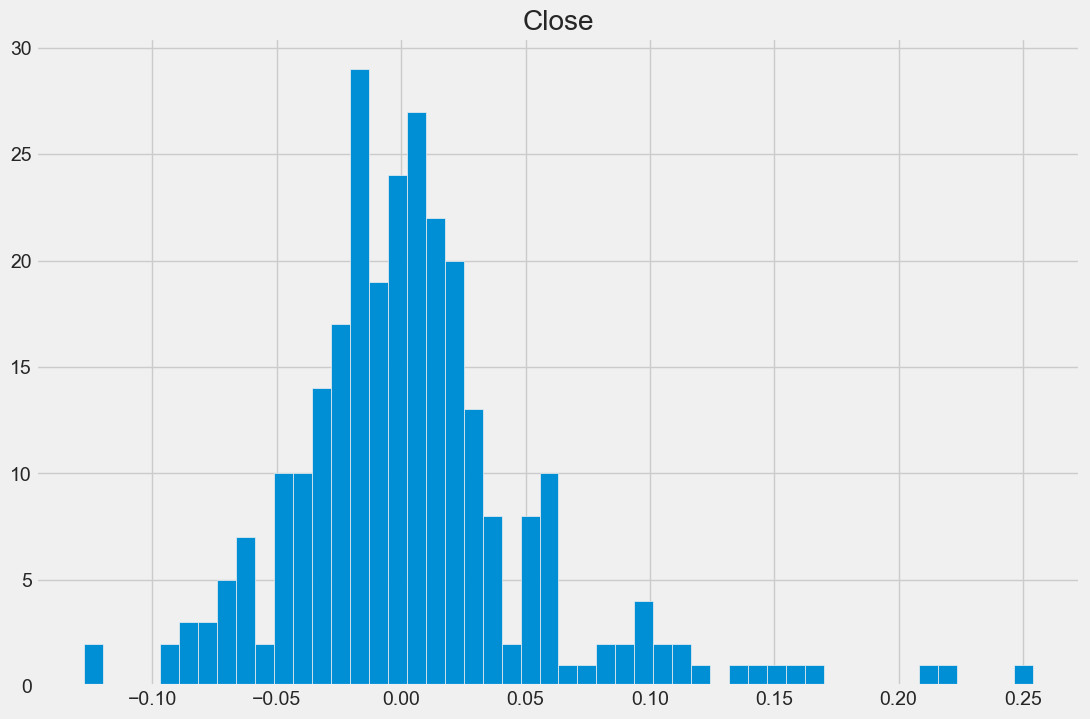

In [50]:
daily_close_px = PLTR_Data[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

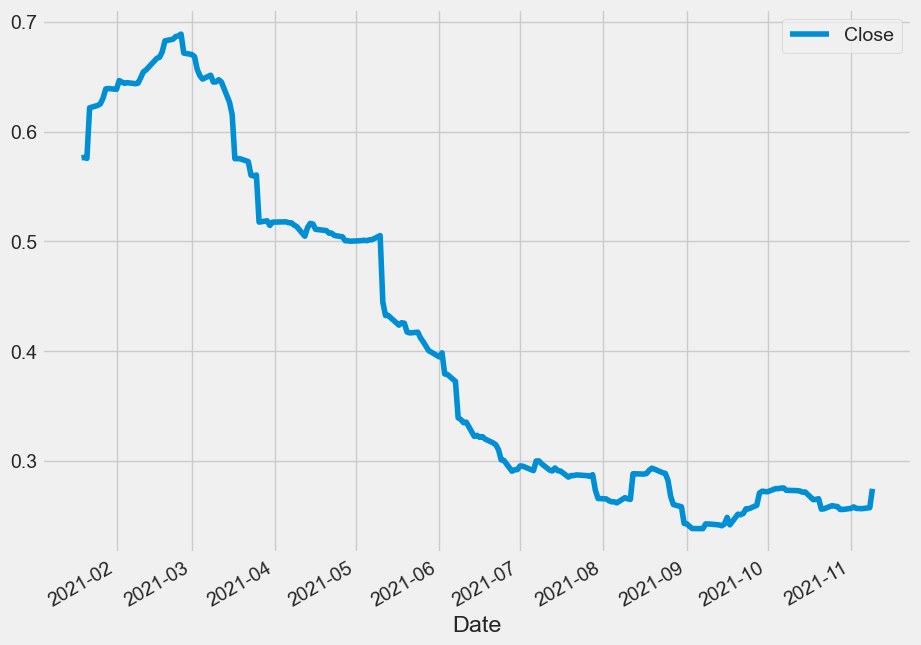

In [51]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

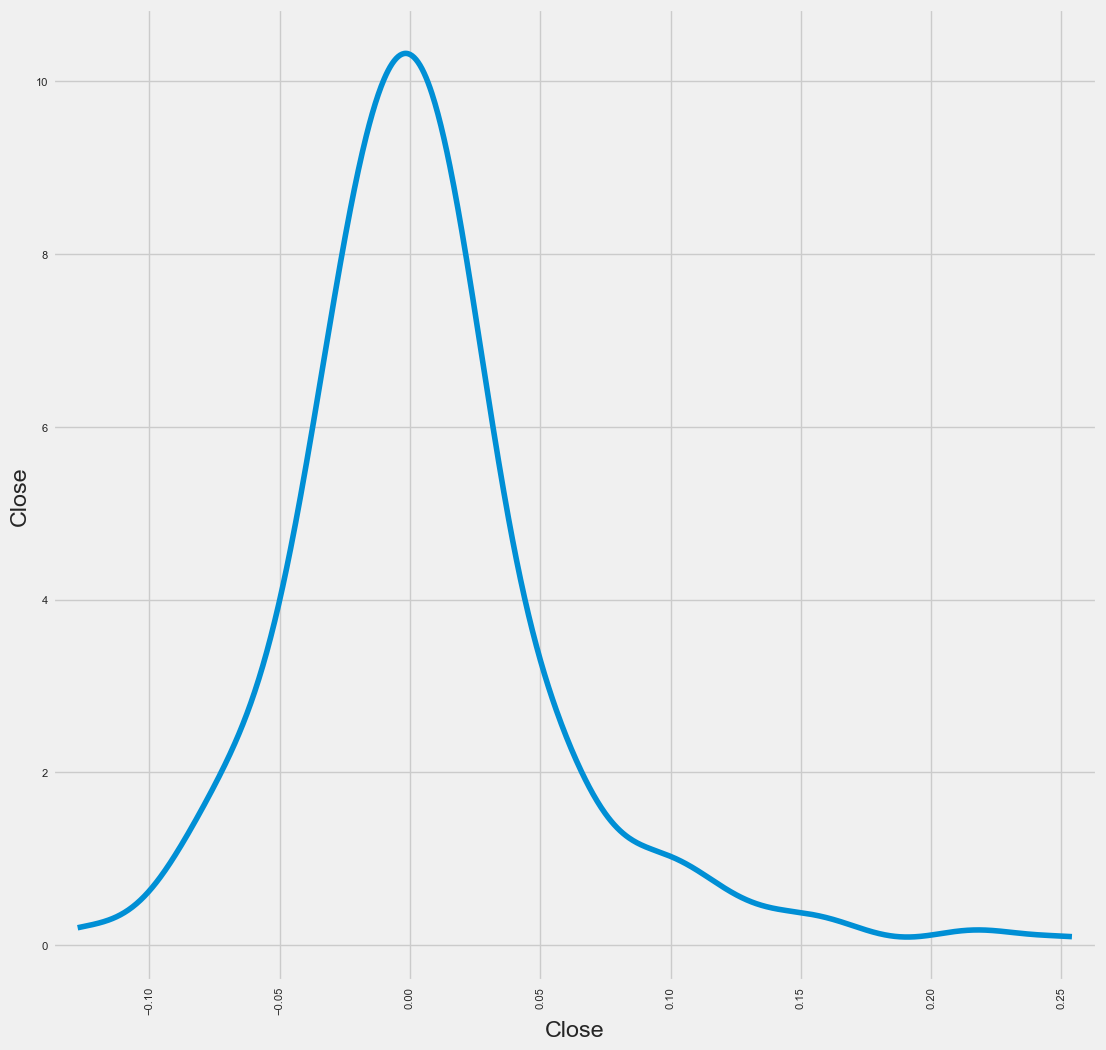

In [52]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5.2 Basic MACD Analysis </span>

In [53]:
import plotly.graph_objects as go

PLTR_Data=PLTR_Data.reset_index()

fig = go.Figure(data=go.Ohlc(x=PLTR_Data['Date'],
        open=PLTR_Data['Open'],
        high=PLTR_Data['High'],
        low=PLTR_Data['Low'],
        close=PLTR_Data['Close']))
fig.show()

In [54]:
PLTR_Data=PLTR_Data.reset_index()

PLTR_Data['SMA5'] = PLTR_Data.Close.rolling(5).mean()
PLTR_Data['SMA20'] = PLTR_Data.Close.rolling(20).mean()
PLTR_Data['SMA50'] = PLTR_Data.Close.rolling(50).mean()
PLTR_Data['SMA200'] = PLTR_Data.Close.rolling(200).mean()
PLTR_Data['SMA500'] = PLTR_Data.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=PLTR_Data['Date'],open=PLTR_Data['Open'],high=PLTR_Data['High'],low=PLTR_Data['Low'],close=PLTR_Data['Close'], name = "OHLC"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

In [55]:
PLTR_Data['EMA5'] = PLTR_Data.Close.ewm(span=5, adjust=False).mean()
PLTR_Data['EMA20'] = PLTR_Data.Close.ewm(span=20, adjust=False).mean()
PLTR_Data['EMA50'] = PLTR_Data.Close.ewm(span=50, adjust=False).mean()
PLTR_Data['EMA200'] = PLTR_Data.Close.ewm(span=200, adjust=False).mean()
PLTR_Data['EMA500'] = PLTR_Data.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=PLTR_Data['Date'],
                              open=PLTR_Data['Open'],
                              high=PLTR_Data['High'],
                              low=PLTR_Data['Low'],
                              close=PLTR_Data['Close'], name = "OHLC"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=PLTR_Data.Date, y=PLTR_Data.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [56]:
PLTR_Data.set_index('Date')

,index,Open,High,Low,Close,Volume,Dividends,Splits,42,252,SMA5,SMA20,SMA50,SMA200,SMA500,EMA5,EMA20,EMA50,EMA200,EMA500
Date,,,,,,,,,,,,,,,,,,,,
2020-09-30,0,10.000000,11.410000,9.110000,9.500000,338584400,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.500000,9.500000,9.500000,9.500000,9.500000
2020-10-01,1,9.690000,10.100000,9.230000,9.460000,124297600,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.486667,9.496190,9.498431,9.499602,9.499840
2020-10-02,2,9.060000,9.280000,8.940000,9.200000,55018300,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.391111,9.467982,9.486728,9.496621,9.498643
2020-10-05,3,9.430000,9.490000,8.920000,9.030000,36316900,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.270741,9.426269,9.468817,9.491978,9.496773
2020-10-06,4,9.040000,10.180000,8.900000,9.900000,90864000,0,0,NaN,NaN,9.418,NaN,NaN,NaN,NaN,9.480494,9.471386,9.485726,9.496038,9.498382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,276,25.889999,26.235001,25.170000,26.120001,25244200,0,0,25.44825,24.558532,26.024,24.771,25.5318,24.88900,NaN,25.941722,25.267214,25.047275,23.378335,19.074501
2021-11-04,277,26.260000,26.570000,25.870001,26.469999,25029700,0,0,25.45675,24.621032,26.190,24.908,25.5742,24.89145,NaN,26.117814,25.381765,25.103068,23.409098,19.104024
2021-11-05,278,26.450001,26.629999,25.719999,26.000000,25929900,0,0,25.44975,24.677063,26.214,25.033,25.5968,24.85855,NaN,26.078543,25.440644,25.138242,23.434878,19.131553


# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 6. ARIMA analysis </span>

In [57]:
PLTR_Data = PLTR_Data.set_index('Date')
PLTR_Data.index
x = PLTR_Data['Open'].resample('MS').mean()
x.head()

Date
2020-09-01    10.000000
2020-10-01     9.821364
2020-11-01    17.142000
2020-12-01    26.613136
2021-01-01    28.125790
Freq: MS, Name: Open, dtype: float64

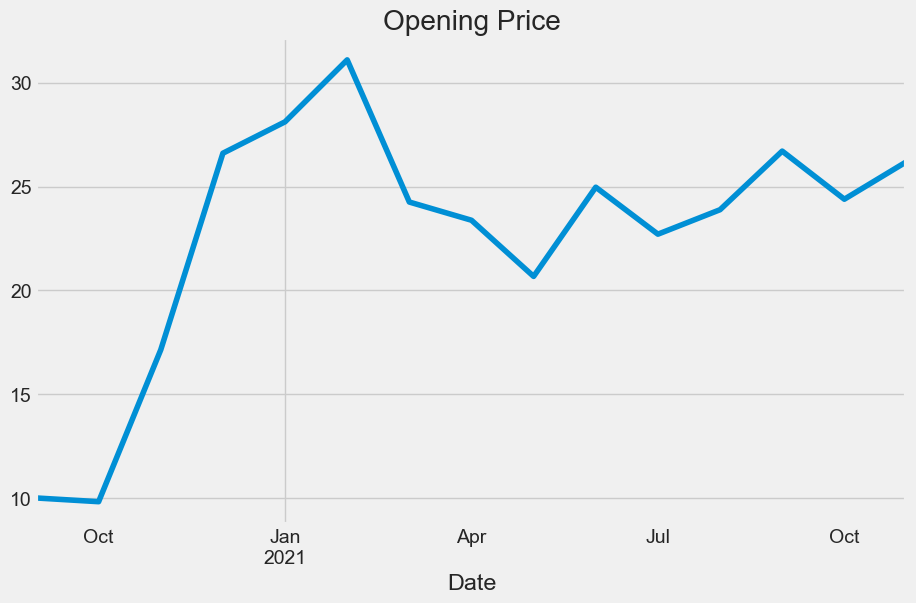

In [58]:
#visualize time series of open price
x.plot(figsize = (10,6))
plt.title("Opening Price")
plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

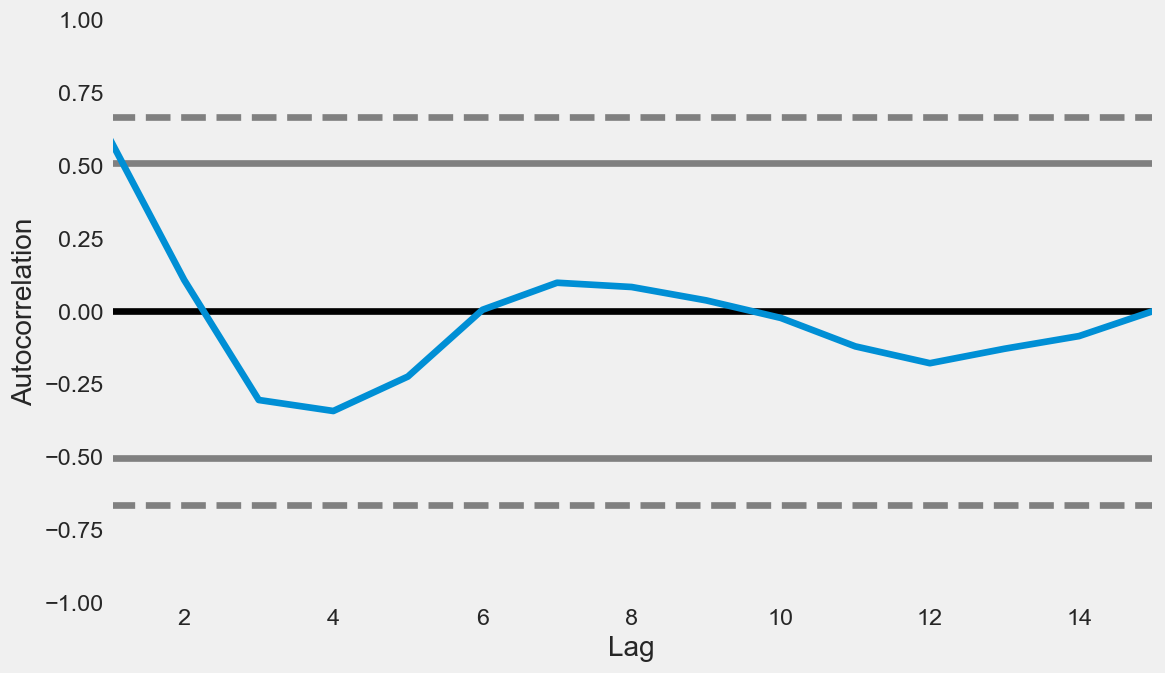

In [100]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(x.tolist())

In [101]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [102]:
#selection of parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:130.8231672384045
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:22.600817603404387
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:17.6601855459633
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:23.860233928834685
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:18.677522156461418
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:110.66592948379586
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:15.368063934856965
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10.02271622774094
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:25.342910485967614


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-8.774322893023093
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:77.38523671913141
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8.020844347752785
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:8.252446601032693
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:11.57444754606791


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-13.932153827815217
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:71.32989762569933
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:13.238602416844284
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:83.93883523333372
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:14.544531538104813
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:12.335516003115789
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-29.87068517823132
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-22.605007665441054
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:80.93726501800032


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:-10.142457418284469
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-6.077121858992628
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-20.029834993411264


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-8.578398106543851
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:78.98649161039452
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:-10.944737654202466


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-11.608822321734655
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-15.199918790431052


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-10.850656114851422
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:70.51092373974211
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-9.782253486777982
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [103]:
#fitting model
model = sm.tsa.statespace.SARIMAX(x, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False,
                                enforce_invertibility = False)
result = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.8979         -0       -inf      0.000       1.898       1.898


In [104]:
'''
result.plot_diagnostics()
plt.show()
y_pred = result.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci = y_pred.conf_int()
print(pred_ci)
#visualize prediction of open price
ax = x['2019':].plot(label = 'Observed')
y_pred.predicted_mean.plot(ax = ax, label = 'One-Step Ahead Forecast', alpha = .7, figsize = (10, 6))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
plt.title("Prediction of Open Price")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()
#prediction of forecast
y_forecasted = y_pred.predicted_mean
y_truth = x['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
#visualize prediction of forecast
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = x.plot(label = 'Observed', figsize = (10,6))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
plt.title("Forecast of Open Price")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()
'''

'\nresult.plot_diagnostics()\nplt.show()\ny_pred = result.get_prediction(start = pd.to_datetime(\'2019-01-01\'), dynamic = False)\npred_ci = y_pred.conf_int()\nprint(pred_ci)\n#visualize prediction of open price\nax = x[\'2019\':].plot(label = \'Observed\')\ny_pred.predicted_mean.plot(ax = ax, label = \'One-Step Ahead Forecast\', alpha = .7, figsize = (10, 6))\nax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = \'k\', alpha = .2)\nplt.title("Prediction of Open Price")\nax.set_xlabel(\'Date\')\nax.set_ylabel(\'Open Price\')\nplt.legend()\nplt.show()\n#prediction of forecast\ny_forecasted = y_pred.predicted_mean\ny_truth = x[\'2019-01-01\':]\nmse = ((y_forecasted - y_truth) ** 2).mean()\nprint(\'The Mean Squared Error of our forecasts is {}\'.format(round(mse, 2)))\nprint(\'The Root Mean Squared Error of our forecasts is {}\'.format(round(np.sqrt(mse), 2)))\n#visualize prediction of forecast\npred_uc = results.get_forecast(steps = 100)\npred_ci = pred_uc.conf_

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">6.1 AD Fuller Tests</span>

In [105]:
# ADF Test
result = adfuller(x, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(x, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.6932183069486584
p-value: 0.004209562269086402
Critial Values:
   1%, -4.473135048010974
Critial Values:
   5%, -3.28988060356653
Critial Values:
   10%, -2.7723823456790124

KPSS Statistic: 0.316931
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\User\AppData\Local\Temp\ipykernel_21152\1511070.py:10: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 7 Back Testing Trading Strategy</span>

In [106]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

## Let us do a bit of backtesting with a value of $100000 

In [107]:
bt = Backtest(ohlc, DemaCross,
              cash=100000, commission=0.015, exclusive_orders=True)

## Back Testing Summary

In [108]:
bt.run()

Start                     2020-09-30 00:00:00
End                       2021-11-09 00:00:00
Duration                    405 days 00:00:00
Exposure Time [%]                   98.220641
Equity Final [$]                131097.912764
Equity Peak [$]                 286852.847218
Return [%]                          31.097913
Buy & Hold Return [%]              155.263158
Return (Ann.) [%]                   27.485138
Volatility (Ann.) [%]              111.858284
Sharpe Ratio                         0.245714
Sortino Ratio                         0.57079
Calmar Ratio                          0.40398
Max. Drawdown [%]                  -68.035868
Avg. Drawdown [%]                  -16.281583
Max. Drawdown Duration      309 days 00:00:00
Avg. Drawdown Duration       49 days 00:00:00
# Trades                                   21
Win Rate [%]                        42.857143
Best Trade [%]                     178.423648
Worst Trade [%]                    -23.796073
Avg. Trade [%]                    

### As you can see, if you had invested <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">`$100K` in Palantir</SPAN> shares, you would have got <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">`$131K` </SPAN> by now with a return of  <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">`31%`!</SPAN> returns

## Use Zoom to see the performance of the stock

In [109]:
bt.plot()

GridPlot(id='p4985', ...)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">7.1 Back Testing using KNN </span>
## Try another strategy - K Nearest Neighbor

##### Reference from Backtesting Manual

##### Please note this is a simple implementation of the example and is no way close to a professional trading strategy. This is purely for showing an example

In [110]:
import numpy as np


def get_X(data):
    """Return model design matrix X"""
    return data.filter(like='X').values


def get_y(data):
    """Return dependent variable y"""
    y = data.Close.pct_change(48).shift(-48)  # Returns after roughly two days
    y[y.between(-.004, .004)] = 0             # Devalue returns smaller than 0.4%
    y[y > 0] = 1
    y[y < 0] = -1
    return y


def get_clean_Xy(df):
    """Return (X, y) cleaned of NaN values"""
    X = get_X(df)
    y = get_y(df).values
    isnan = np.isnan(y)
    X = X[~isnan]
    y = y[~isnan]
    return X, y

In [111]:
data=ohlc

In [112]:
from backtesting.test import SMA

def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

#data = data.apply(pd.to_numeric)
#data = data.dropna().astype(np.float64)
#data.fillna(method="ffill")
#data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data.replace([np.inf, -np.inf], 0.0, inplace=True)
#data = data.fillna(data.mean(), inplace=True)
data = data.dropna().astype(np.float64)


Classification accuracy:  0.7164179104477612


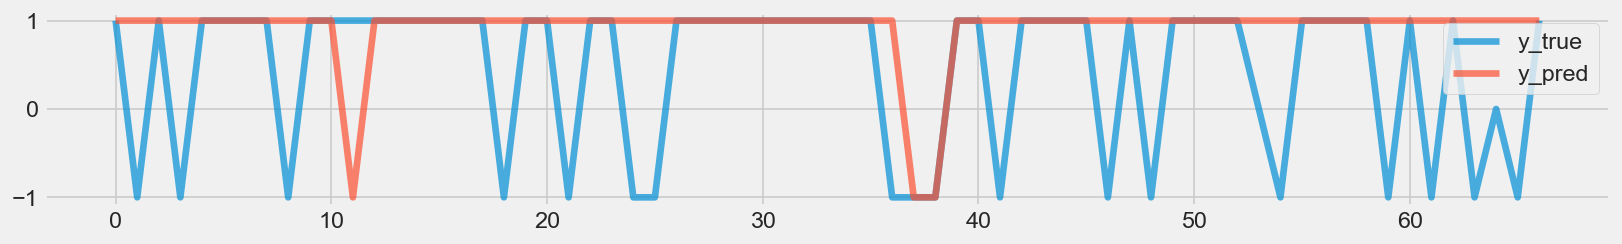

In [113]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [114]:
%%time

from backtesting import Backtest, Strategy

N_TRAIN = 400


class MLTrainOnceStrategy(Strategy):
    price_delta = .004  # 0.4%

    def init(self):        
        # Init our model, a kNN classifier
        self.clf = KNeighborsClassifier(7)

        # Train the classifier in advance on the first N_TRAIN examples
        df = self.data.df.iloc[:N_TRAIN]
        X, y = get_clean_Xy(df)
        self.clf.fit(X, y)

        # Plot y for inspection
        self.I(get_y, self.data.df, name='y_true')

        # Prepare empty, all-NaN forecast indicator
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        # Skip the training, in-sample data
        if len(self.data) < N_TRAIN:
            return

        # Proceed only with out-of-sample data. Prepare some variables
        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        # Forecast the next movement
        X = get_X(self.data.df.iloc[-1:])
        forecast = self.clf.predict(X)[0]

        # Update the plotted "forecast" indicator
        self.forecasts[-1] = forecast

        # If our forecast is upwards and we don't already hold a long position
        # place a long order for 20% of available account equity. Vice versa for short.
        # Also set target take-profit and stop-loss prices to be one price_delta
        # away from the current closing price.
        upper, lower = close[-1] * (1 + np.r_[1, -1]*self.price_delta)

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # Additionally, set aggressive stop-loss on trades that have been open 
        # for more than two days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)


bt = Backtest(data, MLTrainOnceStrategy, commission=.0002, margin=.05)
bt.run()

CPU times: total: 31.2 ms
Wall time: 43.9 ms


Start                     2021-02-23 00:00:00
End                       2021-11-09 00:00:00
Duration                    259 days 00:00:00
Exposure Time [%]                         0.0
Equity Final [$]                      10000.0
Equity Peak [$]                       10000.0
Return [%]                                0.0
Buy & Hold Return [%]               -9.345794
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     0.0
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              NaN
Max. Drawdown [%]                        -0.0
Avg. Drawdown [%]                         NaN
Max. Drawdown Duration                    NaN
Avg. Drawdown Duration                    NaN
# Trades                                    0
Win Rate [%]                              NaN
Best Trade [%]                            NaN
Worst Trade [%]                           NaN
Avg. Trade [%]                    

In [115]:
bt.plot()

GridPlot(id='p5899', ...)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">7.2 Back Testing Trading Strategy Using KNN</span>

In [116]:
from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sPLTR_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sPLTR_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sPLTR_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sPLTR_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sPLTR_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sPLTR_exit)):
                
                self.position.close()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">7.3 BackTesting Trading Strategy Heatmaps</span>

In [117]:
%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(ohlc, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

CPU times: total: 5.73 s
Wall time: 6.39 s


In [118]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10        12571.060070
     80   15       10        10246.845563
     100  15       10         9536.467907
30   40   20       15        13930.727746
          25       15        13434.221775
                                 ...     
100  200  15       10         9727.826971
          20       10        10474.139457
                   15        10446.711370
          25       10        10474.139457
          30       10         9901.995686
Name: Equity Final [$], Length: 177, dtype: float64

In [119]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,40,60,80,100,120,140,160,180,200
n1,,,,,,,,,
20,NaN,12571.060070,10246.845563,9536.467907,NaN,NaN,NaN,NaN,NaN
30,13682.47476,11458.550003,11245.330847,9936.347918,11341.200385,10187.140540,10614.735109,9598.695162,9785.314060
40,NaN,13133.739023,NaN,12509.707522,12252.016807,10308.767473,10427.384269,10013.289064,10056.033696
50,NaN,13980.205437,11873.818915,11727.552540,11413.919932,10550.493558,10452.035701,10281.254378,10259.147002
60,NaN,NaN,11780.401756,11127.960338,9494.274367,9956.096214,9767.091237,10866.026932,9682.692654
70,NaN,NaN,9169.824596,7469.294101,9247.692153,10111.976311,10862.649512,10603.316286,9632.003345
80,NaN,NaN,NaN,9529.327013,8999.590299,10033.540163,10540.357427,10242.072835,10269.639009
90,NaN,NaN,NaN,9190.384001,8732.082516,10894.428545,10218.065342,9890.891747,10176.198570
100,NaN,NaN,NaN,NaN,8494.691509,10129.156398,11181.902494,10023.271055,10204.962588


In [120]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

GridPlot(id='p6660', ...)